# Tarea 1: Reconocimiento basico
Reconocimiento de Patrones (IIC2233)

Primer semestre 2024

Pedro Pablo Zavala Tejos

# 0. Initial Setup

In [154]:
import numpy as np
import matplotlib.pyplot as plt # Libreria para realizar gr치ficos
import cv2 # Libreria para procesamiento morfol칩gico de imagenes

# 1. Image Loading


Cargamos los datos


In [155]:
!wget https://www.dropbox.com/scl/fi/5n62okx5uosbdtvwyzova/kchipun.zip?rlkey=obnuogv12isstmblsrdmekjkb&dl=0 # Cargamos los datos

In [156]:
!mv kchipun.zip?rlkey=obnuogv12isstmblsrdmekjkb kchipun.zip

zsh:1: no matches found: kchipun.zip?rlkey=obnuogv12isstmblsrdmekjkb


In [157]:
!unzip -qq kchipun.zip # descomprimimos el archivo

unzip:  cannot find or open kchipun.zip, kchipun.zip.zip or kchipun.zip.ZIP.


In [158]:
# Funciones para cargar la imagen
def num2fixstr(x: int, d: int) -> str:
    """
    Funcion que retorna un numero x de d digitos

    """
    string = '%0*d' % (d, x)
    return string

def get_image_path(num_class: int, num_img: int, sep='_') -> str:
    BASE_URL = 'kchipun/img_'
    DIGITS_CLASS = 2
    DIGITS_IMG = 4
    path = f'{BASE_URL}{num2fixstr(num_class, DIGITS_CLASS)}{sep}{num2fixstr(num_img, DIGITS_IMG)}.png'
    return path

def imageload(num_class: int, num_img: int, echo='off') -> str:
    """
    Funcion que retorna la ruta de cada imagen
    """
    path = get_image_path(num_class, num_img)
    if echo == 'on':
      print(f'loading image {path} ...')
    img = cv2.imread(path, 0)
    return img

def plot_image(num_class: int, num_img: int, echo='off') -> str:
    """
    Funcion que retorna la imagen num_img de clase num_class
    """
    img = imageload(num_class, num_img, echo='on')
    plt.imshow(img, cmap='gray')

loading image kchipun/img_01_0001.png ...


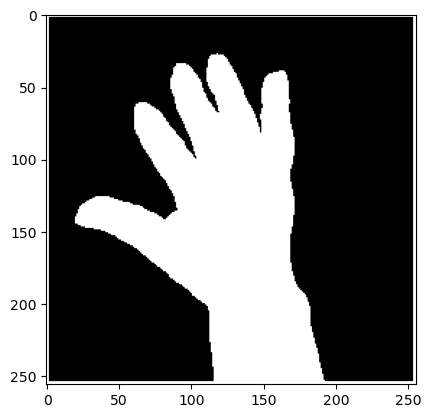

In [159]:
# Veamos el siguiente ejemplo para cargar la primera imagen de cada clase
# 01: Papel; 02: Piedra; 03: Tijera

# Imagen binaria clase papel
plot_image(1, 1)

loading image kchipun/img_02_0001.png ...


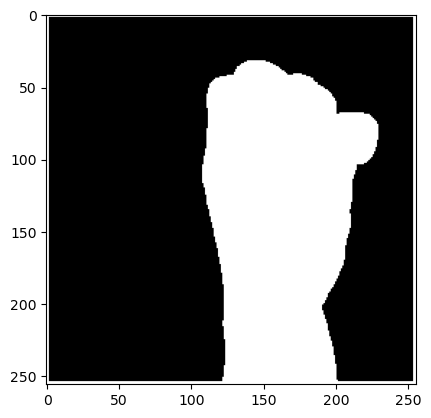

In [160]:
# Imagen binaria clase piedra
plot_image(2, 1)

loading image kchipun/img_03_0001.png ...


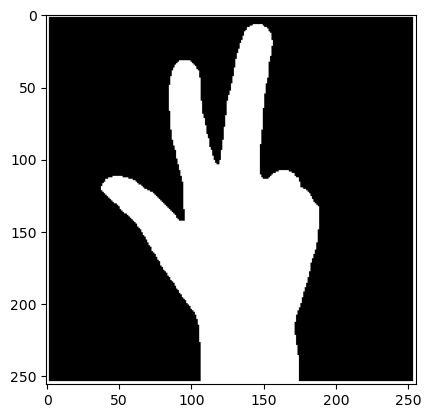

In [161]:
# Imagen binaria clase tijera
plot_image(3, 1)

# 2. Feature Extraction

In [165]:
def erode(img): 
    return cv2.erode(img, np.ones((5,5), np.uint8), iterations=3)

def close(img):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((5,5), np.uint8))

def dilate(img):
    return cv2.dilate(img, kernel=np.ones((3,3), np.uint8), iterations = 3)

def border(img): 
    kernel = np.ones((2,2), np.uint8)
    erode_img = erode(img)
    border_img = cv2.morphologyEx(erode_img, cv2.MORPH_GRADIENT, kernel)
    border_img = close(border_img)
    return border_img


In [176]:

def center_of_mass(img) -> tuple: 
    region = (img != 0) # region de la imagen 
    ij = np.argwhere(region.astype(int)) # coordenadas que pertenecen a la region con valor distinto de 0
    ii = ij[:,0] # coordenadas i
    jj = ij[:,1] # coordenadas j
    i_sum = np.sum(ii) 
    j_sum = np.sum(jj) 
    area = np.sum(region) 

    return (i_sum / area, j_sum / area) 

def extreme_points(img):
    region = np.argwhere((border(img) == 255).astype(int))

    # region_axis_i = region[:,0] # axis x
    # region_axis_j = region[:,1] # axis y
    chull = cv2.convexHull(region)

    # find the most extreme points in the convex hull
    top    = tuple(chull[chull[:, :, 0].argmin()][0])
    bottom = tuple(chull[chull[:, :, 0].argmax()][0])
    left   = tuple(chull[chull[:, :, 1].argmin()][0])
    right  = tuple(chull[chull[:, :, 1].argmax()][0])
    

    # top = region[region[:,0].argmax()]
    # bottom = region[region[:,0].argmin()]
    print(f'top: {top}')
    print(f'left: {left}')
    print(f'right: {right}')
    print(f'bottom: {bottom}')
    # bottom = region[np.argmax(region_axis_j)]
    # left = region[np.argmin(region_axis_i)]
    # right = region[np.argmax(region_axis_i)]
    
    
    return top, bottom, left, right

top: (77, 138)
left: (142, 53)
right: (116, 198)
bottom: (255, 195)


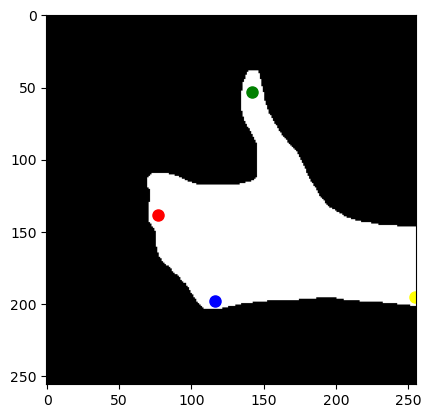

In [201]:
test_image = imageload(2, 10)
top, bottom, left, right = extreme_points(dilate(erode(test_image)))


plt.plot(*top, 'o', markersize=8, markerfacecolor='red', markeredgecolor='red')
plt.plot(*bottom, 'o', markersize=8, markerfacecolor='yellow', markeredgecolor='yellow')
plt.plot(*left, 'o', markersize=8, markerfacecolor='green', markeredgecolor='green')
plt.plot(*right, 'o', markersize=8, markerfacecolor='blue', markeredgecolor='blue')
plt.imshow(np.flip(np.rot90(dilate(erode(test_image)), k=1), axis=0), cmap='gray')
plt.show()


In [ ]:
K = 3 # Cantidad de clases
N = 50 # Numero de muestras por clases

X = np.zeros((N * K, )) # Creamos un arreglo de tama침o N * K con las caracteristicas
Y = np.zeros((N * K, )) # Creamos nuestra variable de respuesta (con las clases)
index = 0

for k in range(1, K + 1):
    for i in range(1, N + 1):
        img = imageload(k, i, echo='on')
        X[index] = normalized_area(img)
        Y[index] = K

        index += 1

loading image kchipun/img_01_0001.png ...


NameError: name 'normalized_area' is not defined

# 3. Training and testing subsets

In [ ]:
# Datos de entrenamiento de las primeras 40 imagenes de cada clase
x0_train = X[0:40]
x1_train = X[50:90]
x2_train = X[100:140]

# Datos de testeo de las ultimas 10 imagenes de cada clase
x0_test = X[40:50]
x1_test = X[90:100]
x2_test = X[140:150]

# Estadisticas de cada clase
# Maximo de cada clase
x0_max = np.max(x0_train)
x1_max = np.max(x1_train)
x2_max = np.max(x2_train)
# Minimo de cada clase
x0_min = np.min(x0_train)
x1_min = np.min(x1_train)
x2_min = np.min(x2_train)
# Promedio de cada clase
x0_mean = np.mean(x0_train)
x1_mean = np.mean(x1_train)
x2_mean = np.mean(x2_train)


print('Statistics')

print('Class 0 (paper):')
print('>>>> min  = '+str(x0_min))
print('>>>> mean = '+str(x0_mean))
print('>>>> max  = '+str(x0_max))
print(' ')

print('Class 1 (scissors):')
print('>>>> min  = '+str(x1_min))
print('>>>> mean = '+str(x1_mean))
print('>>>> max  = '+str(x1_max))

print('Class 2 (rock):')
print('>>>> min  = '+str(x2_min))
print('>>>> mean = '+str(x2_mean))
print('>>>> max  = '+str(x2_max))


Statistics
Class 0 (paper):
>>>> min  = 0.2021331787109375
>>>> mean = 0.3082164764404297
>>>> max  = 0.337371826171875
 
Class 1 (scissors):
>>>> min  = 0.2660369873046875
>>>> mean = 0.3011749267578125
>>>> max  = 0.3375244140625
Class 2 (rock):
>>>> min  = 0.1874237060546875
>>>> mean = 0.3028839111328125
>>>> max  = 0.33758544921875


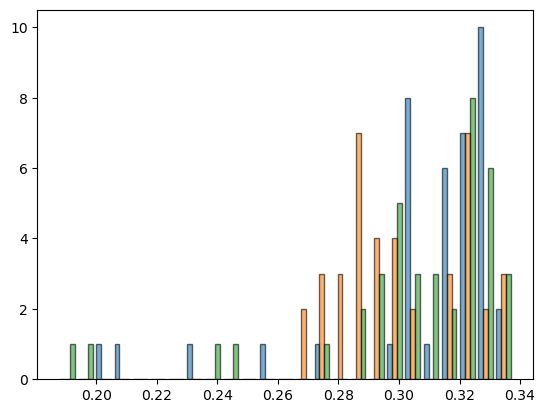

In [ ]:
# Histograma de an치lisis de caracteristicas 
plt.hist([x0_train, x1_train, x2_train], bins=25, label=['paper', 'scissors', 'rock'], alpha=0.6, histtype='bar', ec='black')
plt.show()

# 4. Classification

In [ ]:
threshold_1 = (x0_mean + x1_mean) / 2
threshold_2 = (x1_mean + x2_mean) / 2

def classifier(x):
    if x < threshold_1:
        return 1
    elif threshold_1 <= x < threshold_2:
        return 2
    else:
        return 3
    
Y = np.array([classifier(x) for x in X])

Y0_train = Y[0:40]
Y1_train = Y[50:90]
Y2_train = Y[100:140]

Y0_test = Y[40:50]
Y1_test = Y[90:100]
Y2_test = Y[140:150]

# 5. Evaluation

In [ ]:
def evaluation(Y):
    confusion_matrix = np.zeros((3, 3))
    
    total_true_samples = 0
    total_samples = 0

    for i in range(0, K):
        true_sample  = np.sum(Y[i] == i + 1)
        false_sample = np.sum(Y[i] != i + 1)

        confusion_matrix[i, i] = true_sample # celdas en la diagonal
        confusion_matrix[i, (i + 1) % K] = false_sample # celdas no en la diagonal

        total_true_samples += true_sample
        total_samples += (true_sample + false_sample)

    accuracy = round(total_true_samples * 100 / total_samples, 3)

    return confusion_matrix, accuracy

def print_results(confusion_matrix, accuracy, type):

    print('Testing Confusion Matrix:')
    print(confusion_matrix[0,:])
    print(confusion_matrix[1,:])
    print(confusion_matrix[2,:])

    
    print(f'\n{type} Accuracy = {accuracy}%')

def total_accuracy(acc_test, acc_train):
    return 0.20 * acc_train + 0.8 * acc_test

In [ ]:

Y_test = [Y0_test, Y1_test, Y2_test]
confusion_matrix, AccTest = evaluation(Y_test)
print_results(confusion_matrix, AccTest, type='Testing')

Testing Confusion Matrix:
[2. 8. 0.]
[ 0.  0. 10.]
[2. 0. 8.]

Testing Accuracy = 33.333%


In [ ]:
Y_train = [Y0_train, Y1_train, Y2_train]
confusion_matrix_2, AccTrain = evaluation(Y_train)
print_results(confusion_matrix_2, AccTrain, type='Training')

Testing Confusion Matrix:
[10. 30.  0.]
[ 0.  0. 40.]
[16.  0. 24.]

Training Accuracy = 28.333%


In [ ]:
AccTot = total_accuracy(AccTest, AccTrain)
print(f'Total Accuracy = {AccTot}')

Total Accuracy = 32.333
